# Module 6 - Clustering for Diverse portfolio analysis

   ### Welcome to the Answer notebook for Module 6 ! 
Make sure that you've submitted the module 5 notebook and unlocked Module 6 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os

In [2]:
p= Path('/home/abhishek/AllGit/Aicte_Program/Dataset')
dirs = p.glob('*')

In [3]:
for dirt in dirs:
    print(dirt)

In [4]:
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

NameError: name 'path' is not defined

In [5]:
jet = pd.read_csv("../DataSet/Small_Cap/JETAIRWAYS.csv")
bajaj = pd.read_csv("../DataSet/Large_Cap/BAJFINANCE.csv")
ashoka = pd.read_csv("../DataSet/Small_Cap/ASHOKA.csv")
axis = pd.read_csv("../DataSet/Large_Cap/AXISBANK.csv")
lemon = pd.read_csv("../DataSet/Small_Cap/LEMONTREE.csv")
cipla = pd.read_csv("../DataSet/Large_Cap/CIPLA.csv")
pvr = pd.read_csv("../DataSet/Small_Cap/PVR.csv")
itc = pd.read_csv("../DataSet/Large_Cap/ITC.csv")

In [11]:
stocks = pd.concat([jet['Close Price'],bajaj['Close Price'],ashoka['Close Price'],axis['Close Price']
                 ,lemon['Close Price'],cipla['Close Price'],pvr['Close Price'],itc['Close Price']],axis = 1)

In [12]:
stocks_ret = stocks.pct_change()

In [17]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(8))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (stocks_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(stocks_ret.cov()*252, weights)))

In [18]:
from sklearn.cluster import KMeans

In [28]:
ret_arr = ret_arr.reshape(-1,1)
vol_arr = vol_arr.reshape(-1,1)

In [29]:
km = KMeans()
km.fit(ret_arr,vol_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

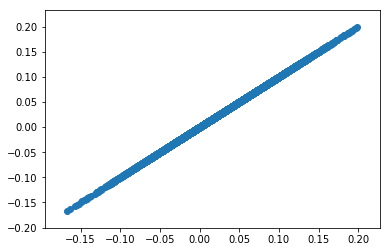

In [34]:
plt.scatter(ret_arr,vol_arr)

In [25]:
ret_arr = np.asarray(ret_arr)
vol_arr = np.asarray(ret_arr)
